In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [19]:
start = '2010-01-01'
end = '2024-04-30'

df = yf.download('AAPL', start=start, end=end)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.673920,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.791061,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.264984,68169400


In [20]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [21]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


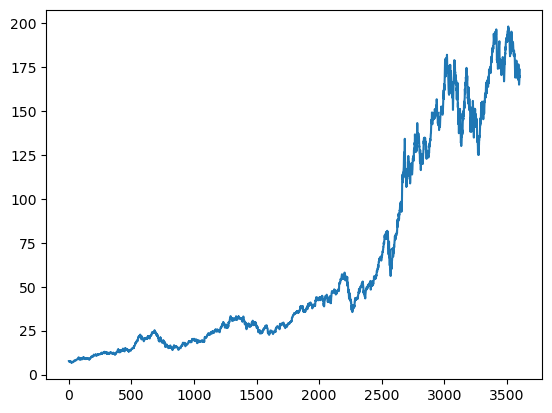

In [22]:
plt.plot(df.Close)

In [23]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3599    182.3640
3600    182.1605
3601    181.9599
3602    181.7405
3603    181.5812
Name: Close, Length: 3604, dtype: float64

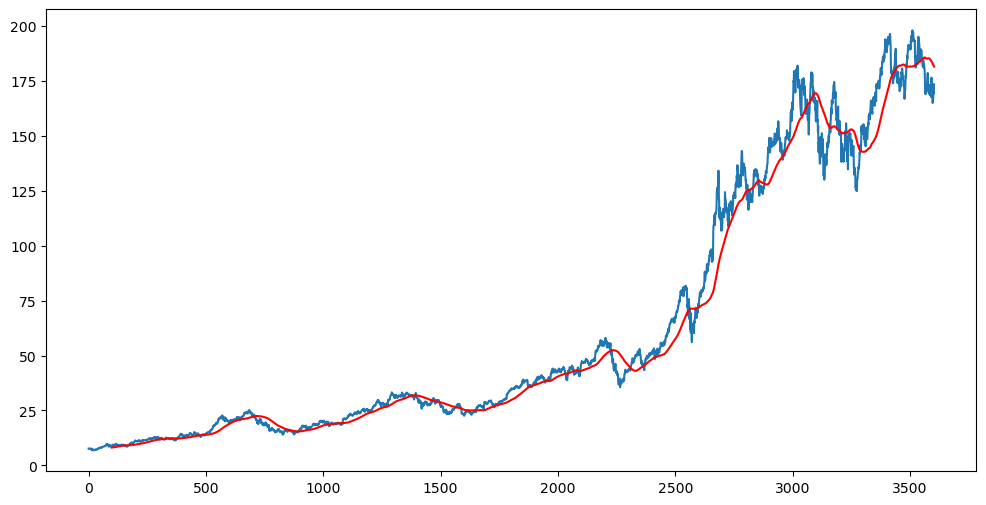

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [25]:
ma200 = df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3599    181.95095
3600    181.85300
3601    181.76205
3602    181.65970
3603    181.57450
Name: Close, Length: 3604, dtype: float64

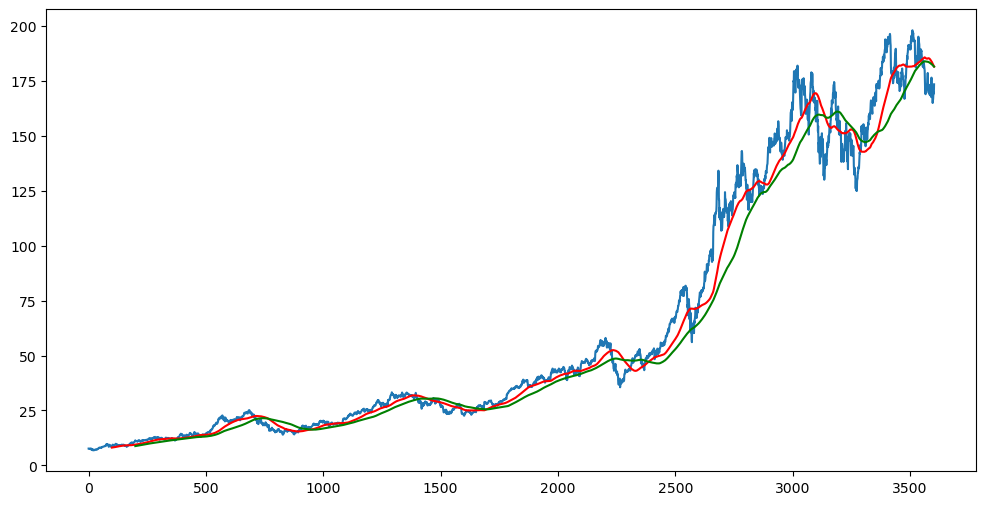

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [27]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2522, 1)
(1082, 1)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01111695],
       [0.01130426],
       [0.009578  ],
       ...,
       [0.96016932],
       [0.97717883],
       [1.        ]])

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
#ML model

from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2)) 

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
               
model.add(Dense(units = 1))

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - loss: 0.0453
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0053
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - loss: 0.0039
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0035
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - loss: 0.0036
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0034
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 0.0034
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - loss: 0.0026
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - loss: 0.0025
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0024
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0023
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0024
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0025
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0021
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [41]:
model.save('keras_model.keras')

In [42]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

,Close
0,52.587502
1,52.590000
2,53.160000
3,53.115002
4,50.660000


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01307224],
       [0.01308918],
       [0.0169549 ],
       ...,
       [0.80861308],
       [0.80461175],
       [0.83309596]])

In [48]:
input_data.shape

(1182, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1082, 100, 1)
(1082,)


In [51]:
# Predictions

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


In [52]:
y_test

array([0.1825873 , 0.1938284 , 0.18657171, ..., 0.80861308, 0.80461175,
       0.83309596])

In [53]:
y_predicted

array([[0.20606516],
       [0.20878083],
       [0.21161711],
       ...,
       [0.7932472 ],
       [0.78988826],
       [0.78722227]], dtype=float32)

In [54]:
scaler.scale_

array([0.00678196])

In [55]:
scale_factor = 1/0.00678196
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

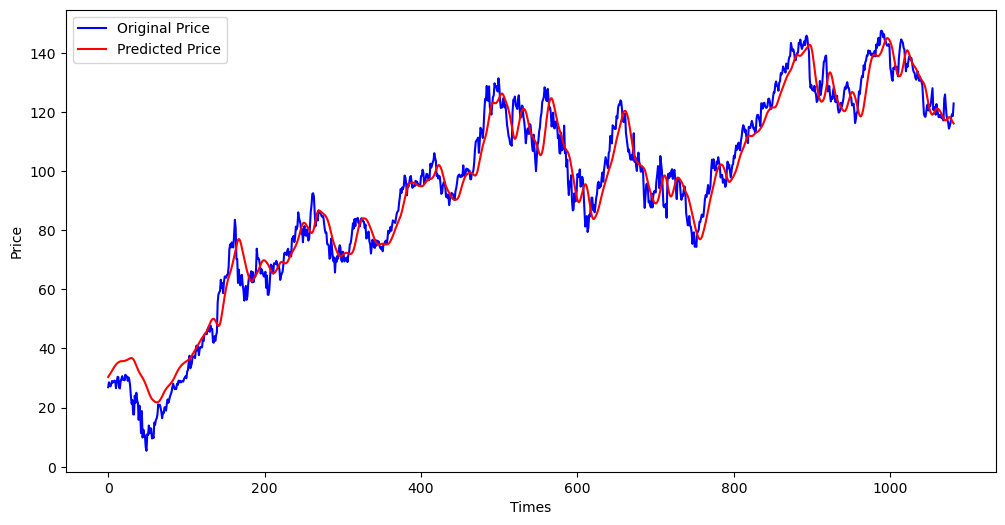

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Times')
plt.ylabel('Price')
plt.legend()
plt.show()